In [1]:
import numpy as np
import pandas as pd
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import missingno as mn
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import ipywidgets as widgets 
from ipywidgets import interact
from ipywidgets import interact_manual 
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 89
pd.options.display.max_rows = 89

In [3]:
# reading the dataset
%time data = pd.read_csv('data-1.csv')
data.shape

CPU times: user 340 ms, sys: 82.6 ms, total: 422 ms
Wall time: 430 ms


(18207, 89)

In [4]:
pd.options.display.max_columns = 89
pd.options.display.max_rows = 89

data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data.iloc[:,13:].describe().style.background_gradient(cmap = 'cividis')

,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
data.iloc[:,2:].describe(include = 'object')

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€1.1M,€1K,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


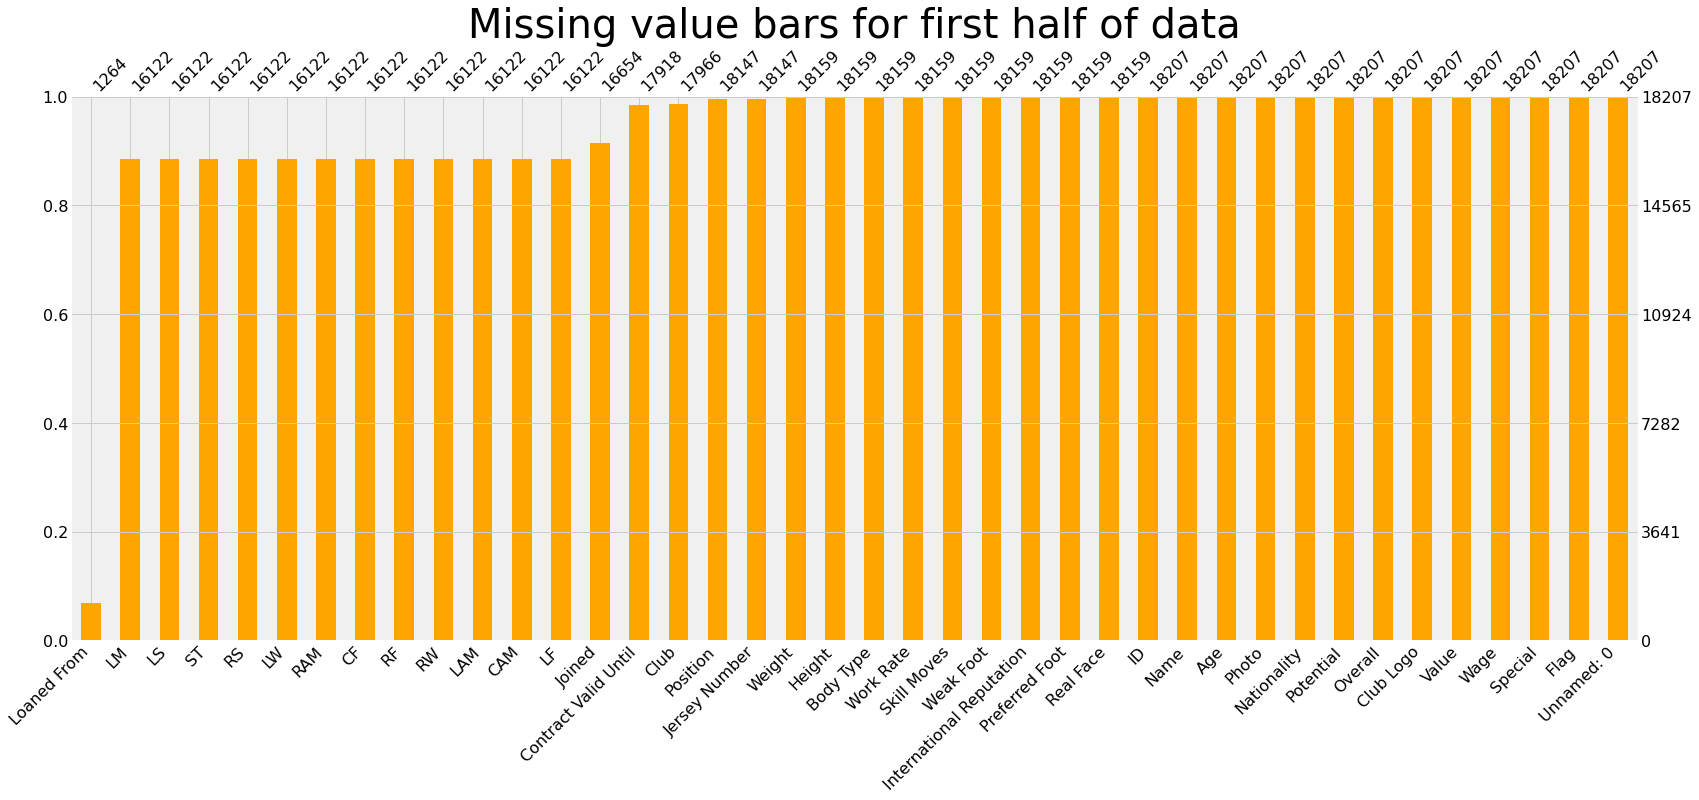

In [7]:
mn.bar(data.iloc[:,:40],
        color = 'orange',
         sort = 'ascending')
plt.title('Missing value bars for first half of data',fontsize = 40)
plt.show()

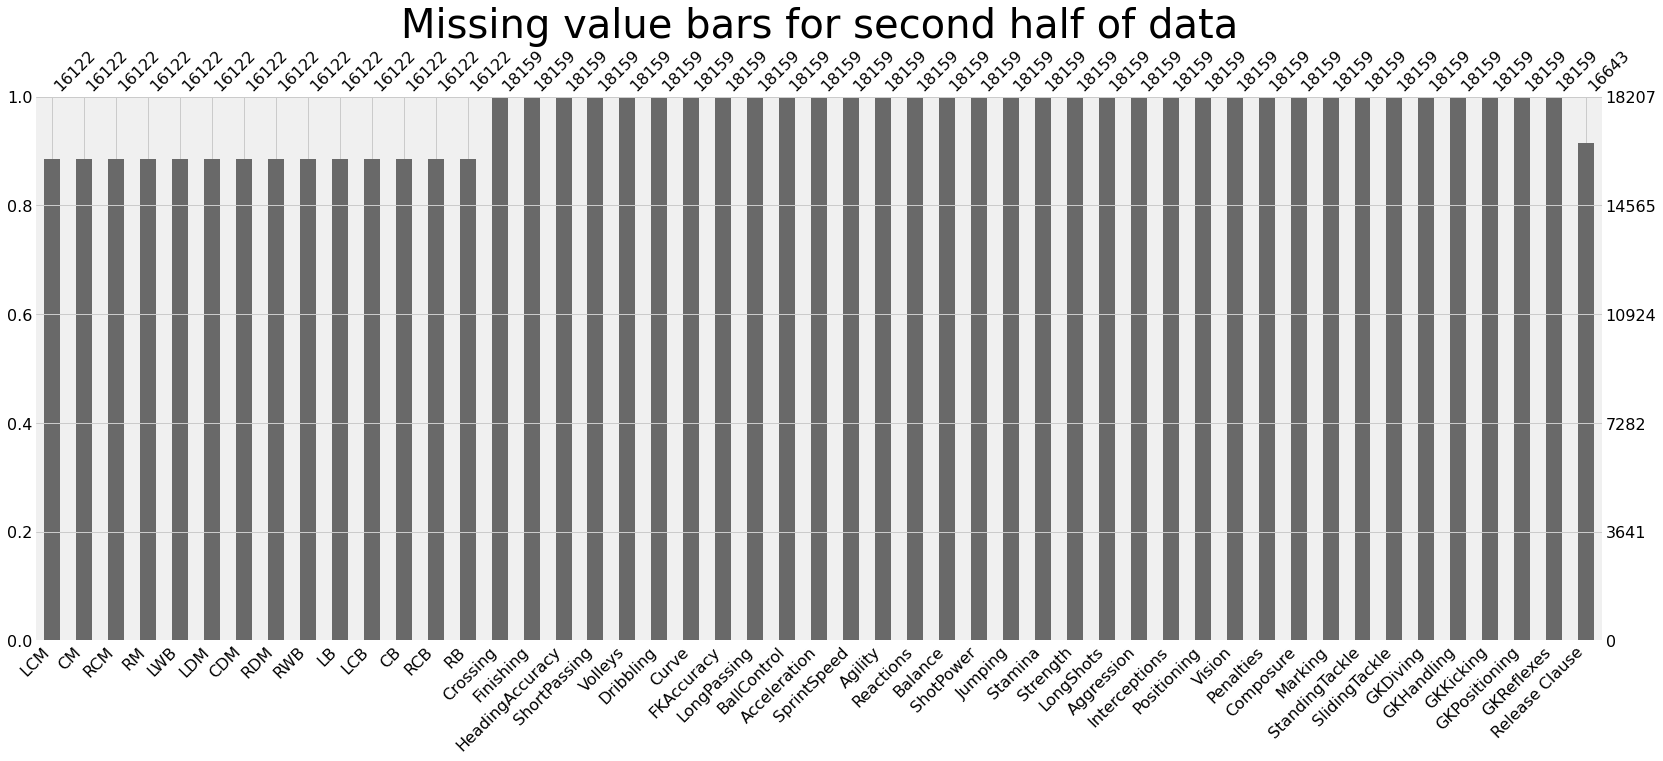

In [8]:
mn.bar(data.iloc[:,40:])
plt.title('Missing value bars for second half of data',fontsize = 40)
plt.show()

In [9]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(),inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(),inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(),inplace = True)
data['Curve'].fillna(data['Curve'].mean(),inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(),inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(),inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(),inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(),inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(),inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(),inplace = True)
data['Weight'].fillna('200lbs',inplace = True)
data['Height'].fillna("5'11",inplace = True)
data['Loaned From'].fillna("None",inplace = True)
data['Joined'].fillna("July 1, 2018",inplace = True)
data['Jersey Number'].fillna(8,inplace = True)
data['Body Type'].fillna('Normal',inplace = True)
data['Position'].fillna('ST',inplace = True)
data['Club'].fillna('No Club',inplace = True)
data['Work Rate'].fillna('Medium/ Medium',inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(),inplace = True)
data['Weak Foot'].fillna(3,inplace = True)
data['Preferred Foot'].fillna('Right',inplace = True)
data['International Reputation'].fillna(1,inplace = True)
data['Wage'].fillna('200k',inplace = True)
data.fillna(0,inplace = True)

In [15]:
data.isnull().sum()

Unnamed: 0    0
ID            0
Name          0
Age           0
Photo         0
             ..
passing       0
mental        0
mobility      0
power         0
rating        0
Length: 96, dtype: int64

In [18]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [11]:
def defending(data):
    return int(round(data[['Marking','StandingTackle','SlidingTackle']].mean().mean()))

def general(data):
    return int(round(data[['HeadingAccuracy','Dribbling','Curve','BallControl']].mean().mean()))

def passing(data):
    return int(round(data[['ShortPassing','LongPassing','Crossing']].mean().mean()))

def mental(data):
    return int(round(data[['Aggression','Interceptions','Positioning','Vision','Composure']].mean().mean()))

def mobility(data):
    return int(round(data[['Acceleration','SprintSpeed','Agility','Reactions']].mean().mean()))

def power(data):
    return int(round(data[['Balance','Jumping','Stamina','Strength']].mean().mean()))

def rating(data):
    return int(round(data[['Potential','Overall']].mean().mean()))

In [19]:
def shooting(data):
    return int(round(data[['Finishing','Volleys','FKAccuracy','ShotPower','LongShots','Penalties']].mean().mean()))

In [13]:
data['defending'] = data.apply(defending,axis = 1)

In [14]:
data['general'] = data.apply(general,axis = 1)
data['passing'] = data.apply(passing,axis = 1)
data['mental'] = data.apply(mental,axis = 1)
data['mobility'] = data.apply(mobility,axis = 1)
data['power'] = data.apply(power,axis = 1)
data['rating'] = data.apply(rating,axis = 1)

In [20]:
data['shooting'] = data.apply(shooting,axis = 1)

In [26]:
pd.options.display.max_rows = 100000

In [51]:
data.loc[data.groupby('Position')['Overall'].idxmax()][['Position'
                                                        ,'Name'
                                                        ,'Age'
                                                        ,'Club'
                                                        ,'Nationality'
                                                        ,'Overall']].sort_values('Overall',
                                                                                 ascending = False).style.background_gradient(cmap = 'pink')





,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


### Find the Most Expensive Players whose contracts are going to Expire Soon

### Make a Function to Generate a Report for Players

### Compare Indian Footballers with Russian Footballers

### Find the Most Popular Footballers under 20